In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Main objective of the analysis is to predict the quality of wine good or Bad.

two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent).

### Two datasets one for red wine and one for white wine
### Number of Instances: red wine - 1599; white wine - 4898. 
### Number of Attributes: 11 + output attribute

* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol

* Output variable (based on sensory data): 
* 12 - quality (score between 0 and 10)

In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# check null values and data types

In [6]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# combine datasets in wine_df
add a new feature or column to each data set to indicate whether the wine is red or white.

In [8]:
red_wine['color'] = 'red'
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
white_wine['color'] = 'white'
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [10]:
# append dataframes
wine_df = red_wine.append(white_wine, sort=False)

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [12]:
wine_df.to_csv('winequality_edited.csv', sep=';')

In [13]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [14]:
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

## in this part i check the data quality, assess any issues in the data and fix it:
- null values in each column 
- each column has the proper data type
- duplicate rows
- outliers
- distribution for each column (skewness)

# check for nulls

In [15]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

# check columns datatypes

In [16]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


# check duplicates and remove

In [17]:
sum(wine_df.duplicated())

1177

In [18]:
wine_df.drop_duplicates(inplace =True)

In [19]:
sum(wine_df.duplicated())

0

# check for outliers and skewness

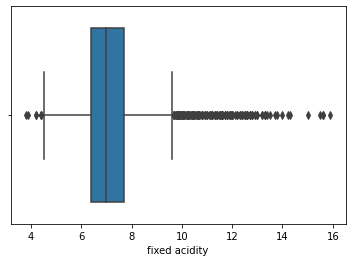

skewness of fixed acidity is 1.6504171812404804


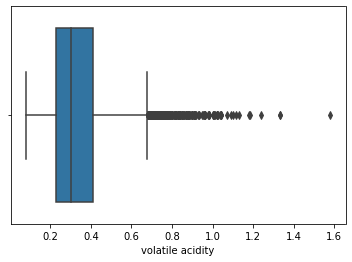

skewness of volatile acidity is 1.5045572014481647


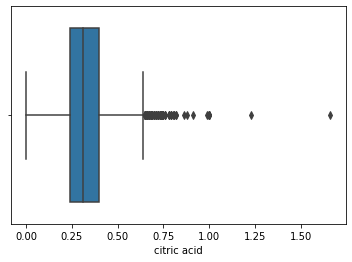

skewness of citric acid is 0.48430902797982095


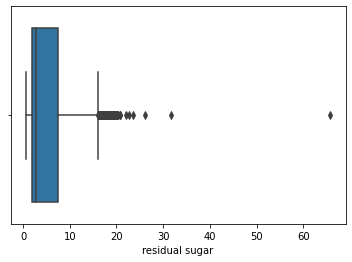

skewness of residual sugar is 1.7065502704869113


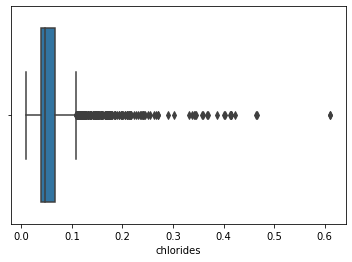

skewness of chlorides is 5.338236960791629


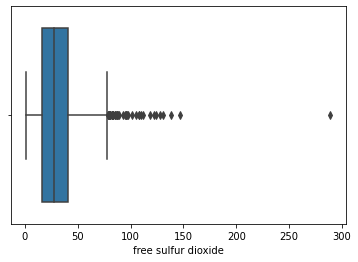

skewness of free sulfur dioxide is 1.3627194619464467


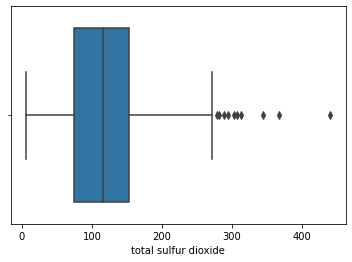

skewness of total sulfur dioxide is 0.06361443392014983


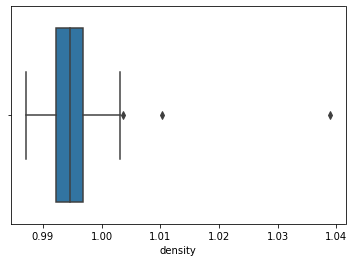

skewness of density is 0.6663258197124551


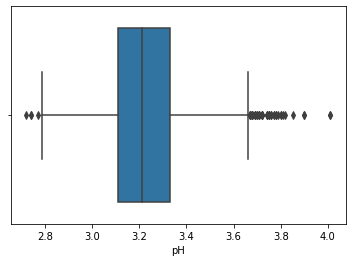

skewness of pH is 0.38996921434552967


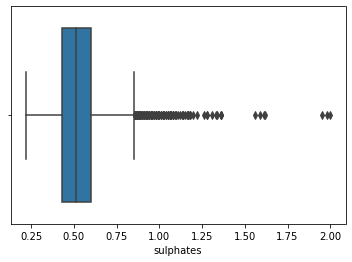

skewness of sulphates is 1.8094537738794463


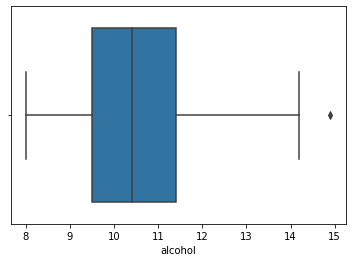

skewness of alcohol is 0.545695978384562


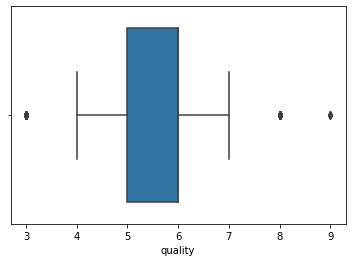

skewness of quality is 0.1474673665121148


In [20]:
columns_to_unskew = []
for col in wine_df.columns:
    if col != 'color':
        sns.boxplot(x = wine_df[col])
        plt.show()

        skew = wine_df[col].skew()
        print("skewness of {} is {}".format(col, skew))
        if skew > 1 or skew <- 1:
            columns_to_unskew.append(col)

##  most of the features are skewed and have lots of outliers so we can't remove them
## outliers could be wine with very high quality or very low quality

## log transformation

In [21]:
for col in columns_to_unskew:
    wine_df[col] = np.log(wine_df[col])
    print("skewness of {} is {}".format(col, wine_df[col].skew()))

skewness of fixed acidity is 0.8431187613658074
skewness of volatile acidity is 0.3304079923552218
skewness of residual sugar is 0.32647404052053697
skewness of chlorides is 0.9066531061816026
skewness of free sulfur dioxide is -0.7893362805953683
skewness of sulphates is 0.39395419995852554


# encode color column

In [22]:
wine_df['color']= pd.get_dummies(wine_df['color'], drop_first=True)

In [23]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,34.0,0.99780,3.51,-0.579818,9.4,5,0
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,67.0,0.99680,3.20,-0.385662,9.8,5,0
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,54.0,0.99700,3.26,-0.430783,9.8,5,0
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,60.0,0.99800,3.16,-0.544727,9.8,6,0
5,2.001480,-0.415515,0.00,0.587787,-2.590267,2.564949,40.0,0.99780,3.51,-0.579818,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.824549,-1.560648,0.29,0.470004,-3.244194,3.178054,92.0,0.99114,3.27,-0.693147,11.2,6,1
4894,1.887070,-1.139434,0.36,2.079442,-3.057608,4.043051,168.0,0.99490,3.15,-0.776529,9.6,5,1
4895,1.871802,-1.427116,0.19,0.182322,-3.194183,3.401197,111.0,0.99254,2.99,-0.776529,9.4,6,1
4896,1.704748,-1.237874,0.30,0.095310,-3.816713,2.995732,110.0,0.98869,3.34,-0.967584,12.8,7,1


In [24]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,1.000000,0.220109,0.320073,-0.068722,0.376426,-0.326154,-0.307004,0.483131,-0.291425,0.281534,-0.123079,-0.091052,-0.473887
volatile acidity,0.220109,1.000000,-0.340334,-0.086402,0.443129,-0.380876,-0.365291,0.307104,0.201273,0.245456,-0.048363,-0.257036,-0.625216
citric acid,0.320073,-0.340334,1.000000,0.123839,-0.012140,0.116065,0.194835,0.094758,-0.344735,0.037581,-0.005496,0.097954,0.183759
residual sugar,-0.068722,-0.086402,0.123839,1.000000,-0.097723,0.365977,0.469693,0.480986,-0.214883,-0.154597,-0.258628,-0.027043,0.287201
chlorides,0.376426,0.443129,-0.012140,-0.097723,1.000000,-0.286262,-0.310019,0.533019,0.109704,0.395847,-0.382938,-0.272067,-0.639336
free sulfur dioxide,-0.326154,-0.380876,0.116065,0.365977,-0.286262,1.000000,0.740785,-0.077548,-0.139170,-0.229993,-0.124016,0.115441,0.540016
total sulfur dioxide,-0.307004,-0.365291,0.194835,0.469693,-0.310019,0.740785,1.000000,0.006711,-0.222956,-0.265684,-0.249004,-0.050296,0.694229
density,0.483131,0.307104,0.094758,0.480986,0.533019,-0.077548,0.006711,1.000000,0.034273,0.302393,-0.667811,-0.326434,-0.429377
pH,-0.291425,0.201273,-0.344735,-0.214883,0.109704,-0.139170,-0.222956,0.034273,1.000000,0.209510,0.097314,0.039733,-0.310919
sulphates,0.281534,0.245456,0.037581,-0.154597,0.395847,-0.229993,-0.265684,0.302393,0.209510,1.000000,-0.038807,0.031693,-0.496562


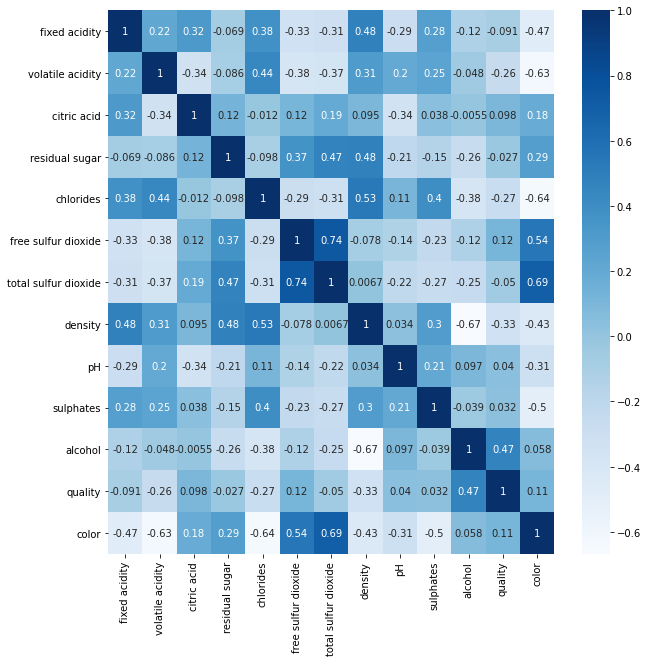

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_df.corr(),cbar=True,annot=True,cmap='Blues');

# remove feature with correlation more than 0.7

In [26]:
for a in range(len(wine_df.corr().columns)):
    for b in range(a):
        if abs(wine_df.corr().iloc[a,b]) >0.7:
            name = wine_df.corr().columns[a]
            print(name, a, b)

total sulfur dioxide 6 5


In [27]:
wine_df= wine_df.drop('total sulfur dioxide',axis=1)

# check categries

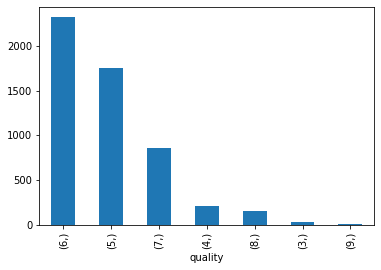

In [28]:
wine_df[['quality']].value_counts().plot(kind='bar');

# The data is very unbalanced

In [29]:
wine_df.shape

(5320, 12)

In [30]:
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [31]:
wine_df['quality'].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

### wine with quality > 5 is considered good 
### wine with quality <= 5 is considered bad

In [32]:
wine_df.loc[wine_df['quality'] <=5, 'quality'] = 0
wine_df.loc[wine_df['quality'] > 5, 'quality'] = 1
wine_df['quality'].value_counts()

1    3332
0    1988
Name: quality, dtype: int64

# features and labels

In [33]:
X = wine_df.drop(columns='quality')
print(X.shape)

(5320, 11)


In [34]:
y = wine_df['quality']
print(y.shape)

(5320,)


# Train Test split

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

sss=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=0)

for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

<AxesSubplot:>

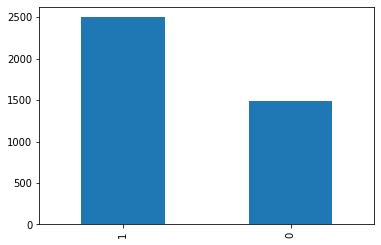

In [36]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

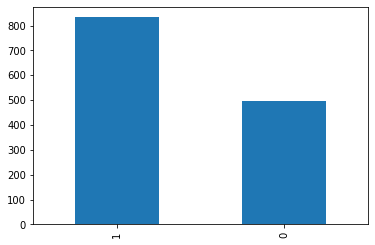

In [37]:
y_test.value_counts().plot(kind='bar')

# Models

In [38]:
scores_dict = {}

# logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model1 = LogisticRegression(max_iter= 1000,  class_weight='balanced')
model1.fit(X_train_scaled, y_train)
print("Train score: ", model1.score(X_train_scaled, y_train))
y_pred = model1.predict(X_test_scaled)


Train score:  0.7343358395989975


In [40]:
cr_lr = classification_report(y_test, y_pred, output_dict=True)
cr_lr

{'0': {'precision': 0.6378466557911908,
  'recall': 0.7867203219315896,
  'f1-score': 0.7045045045045045,
  'support': 497},
 '1': {'precision': 0.8521617852161785,
  'recall': 0.7334933973589436,
  'f1-score': 0.7883870967741935,
  'support': 833},
 'accuracy': 0.7533834586466165,
 'macro avg': {'precision': 0.7450042205036846,
  'recall': 0.7601068596452666,
  'f1-score': 0.7464458006393491,
  'support': 1330},
 'weighted avg': {'precision': 0.7720756052731567,
  'recall': 0.7533834586466165,
  'f1-score': 0.7570414965049939,
  'support': 1330}}

In [41]:
scores_dict['logistic_regression'] = cr_lr['macro avg']['f1-score']

In [42]:
scores_dict

{'logistic_regression': 0.7464458006393491}

# SVM

In [43]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
parameters = { 'svc__gamma':['auto'],
             'svc__C':[ 0.1, 1, 10, 100],
             'svc__kernel':['linear', 'rbf'] }

grid_svc = GridSearchCV(pipe, parameters, cv=3)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100], 'svc__gamma': ['auto'],
                         'svc__kernel': ['linear', 'rbf']})

In [44]:
grid_svc.best_params_

{'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}

In [45]:
print("Train score: ", grid_svc.score(X_train, y_train))

Train score:  0.7884711779448621


In [46]:
y_pred = grid_svc.predict(X_test)
svc_test = classification_report(y_test, y_pred, output_dict=True)
scores_dict['svc'] = svc_test['macro avg']['f1-score']

In [47]:
scores_dict

{'logistic_regression': 0.7464458006393491, 'svc': 0.7550895140664962}

# ensemble

## random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth':[2,3,4,5,6,7,8,9,10]}
grid_rf = GridSearchCV( RandomForestClassifier(), parameters, cv=3)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [49]:
grid_rf.best_params_

{'max_depth': 10}

In [50]:
print("Train score: ", grid_rf.score(X_train, y_train))

Train score:  0.9090225563909774


In [51]:
y_pred = grid_rf.predict(X_test)
rf_test = classification_report(y_test, y_pred, output_dict=True)
scores_dict['Random forest'] = rf_test['macro avg']['f1-score']

In [52]:
scores_dict

{'logistic_regression': 0.7464458006393491,
 'svc': 0.7550895140664962,
 'Random forest': 0.7583768017838656}

## bagging 

In [53]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(),
                         n_estimators=50).fit(X_train, y_train)

score_train = clf.score(X_train, y_train)
print("train score of bagging with svc: ", score_train)
y_pred = clf.predict(X_test)
bag_test = classification_report(y_test, y_pred, output_dict=True)
scores_dict['Bagging_svc'] = bag_test['macro avg']['f1-score']

train score of bagging with svc:  0.7358395989974937


In [54]:
scores_dict

{'logistic_regression': 0.7464458006393491,
 'svc': 0.7550895140664962,
 'Random forest': 0.7583768017838656,
 'Bagging_svc': 0.7254033945594048}

# opservation and flaws
### 1- several of the attributes are correlated
### 2- Data had lot's of outliers
### 3- unbalanced classes

# Best model
### the best score on the testset was acheived by  Random forest with an avg f1-score of 0.758

# future steps
### 1- Outlier detection algorithms could be used to detect the few excellent or poor wines.
### upsampling or downsampling techniques